In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib import rcParams

%matplotlib inline

In [5]:
TEXT_COLOUR = {
    'PURPLE':'\033[95m',
    'CYAN':'\033[96m',
    'DARKCYAN':'\033[36m',
    'BLUE':'\033[94m',
    'GREEN':'\033[92m',
    'YELLOW':'\033[93m',
    'RED':'\033[91m',
    'BOLD':'\033[1m',
    'UNDERLINE':'\033[4m',
    'END':'\033[0m'
}

def print_bold(*msgs):
    print(TEXT_COLOUR['BOLD'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def print_green(*msgs):
    print(TEXT_COLOUR['GREEN'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def print_error(*msgs):
    print(TEXT_COLOUR['RED'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def wrap_green(msg):
    return TEXT_COLOUR['GREEN'] + msg + TEXT_COLOUR['END']

def wrap_red(msg):
    return TEXT_COLOUR['RED'] + msg + TEXT_COLOUR['END']

def up_down_str(val):
    msg = str(val)
    if val > 0:
        msg = wrap_green(msg)
    elif val < 0:
        msg = wrap_red(msg)
    return msg

In [6]:
dataset = 'CoLA'
num_layer = 12
num_heads = 12

In [7]:
components = ["attention_head", "attention_output", "intermediate_dense", "output_dense", "freeze_all"]
exps = ["freeze_one_results", "reverse_results", "incremental_results"]
base_acc = 0

freeze_one_results = {}
reverse_results = {}
incremental_results = {}

for comp in components:
    f=open(f"../../freezing_results/{comp}/{dataset}/base.txt", "r")
    lines = f.read().splitlines()
    base_acc = float(lines[0])
    
    freeze_one_results[comp] = []
    for line in lines[1:]:
        freeze_one_results[comp].append(float(line.split()[-1]))

    f=open(f"../../freezing_results/{comp}/{dataset}/reverse.txt", "r")
    lines = f.read().splitlines()
    reverse_results[comp] = []
    for line in lines[1:]:
        reverse_results[comp].append(float(line.split()[-1]))

    f=open(f"../../freezing_results/{comp}/{dataset}/incremental.txt", "r")
    lines = f.read().splitlines()
    incremental_results[comp] = []
    for line in lines[1:]:
        incremental_results[comp].append(float(line.split()[-1]))
    
            
base_acc
results = {
    "freeze_one_results": freeze_one_results,
    "reverse_results": reverse_results,
    "incremental_results": incremental_results
}


In [8]:
color_dict = {
            0 :'r',
            1 :'g',
            2 :'b',
            3 :'y',
            4 :'cyan',
            5 :'magenta',
            6 :'black',
            7 :'grey',
            8 :'orange',
            9 :'purple',
            10 :'navy',
            11 :'pink'
        }

In [9]:
def draw_graph(results):
    
    plt.figure(figsize=(10,6))
    x_axis = range(num_layer)
    hdles = []
    for ind, comp in enumerate(components):
        handle, = plt.plot(x_axis, results[comp], c=color_dict[ind], label=comp)
        hdles.append(handle)
    plt.xlabel("layers")
    plt.ylabel("accuracy")
    
    plt.legend(handles=hdles)
    
    plt.axhline(y=base_acc, linestyle='--')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 15})
    plt.show()

freeze_one_results 0.5650322558145829


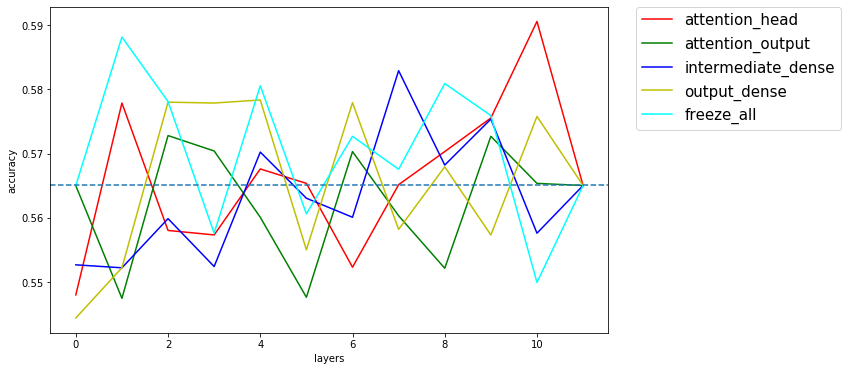

reverse_results 0.5650322558145829


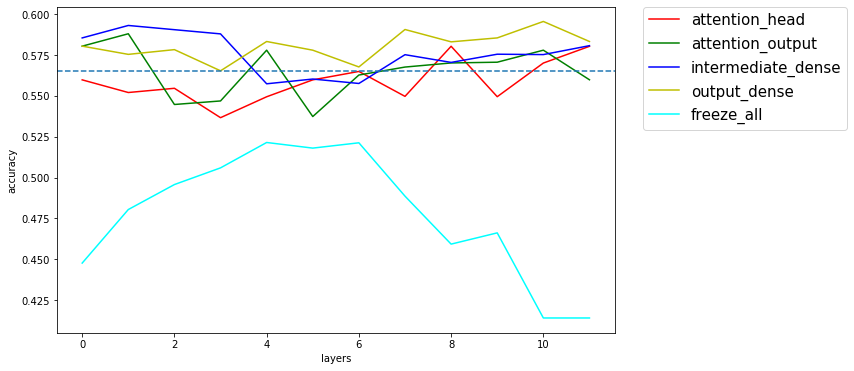

incremental_results 0.5650322558145829


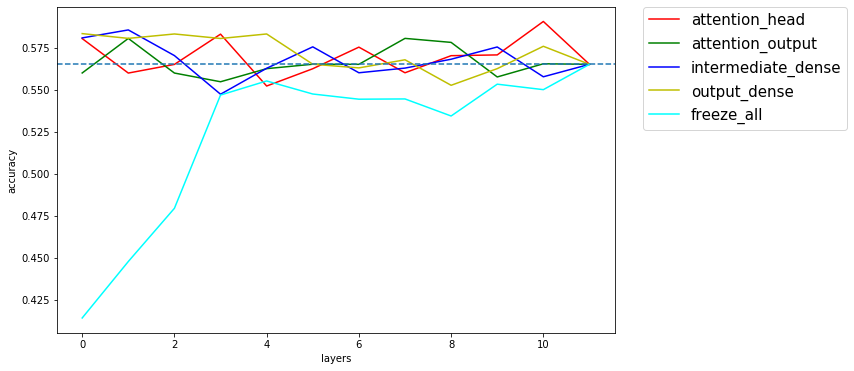

In [10]:
for exp, result in results.items():
    print(exp, base_acc)
    draw_graph(result)

In [11]:
reverse_incremental_results = {
    "reverse_incremental":[]
}

f=open(f"../../freezing_results/freeze_all/{dataset}/reverse_incremental.txt", "r")
lines = f.read().splitlines()
incremental_results[comp] = []
for line in lines[1:]:
    reverse_incremental_results["reverse_incremental"].append(float(line.split()[-1]))

reverse_incremental 0.5650322558145829


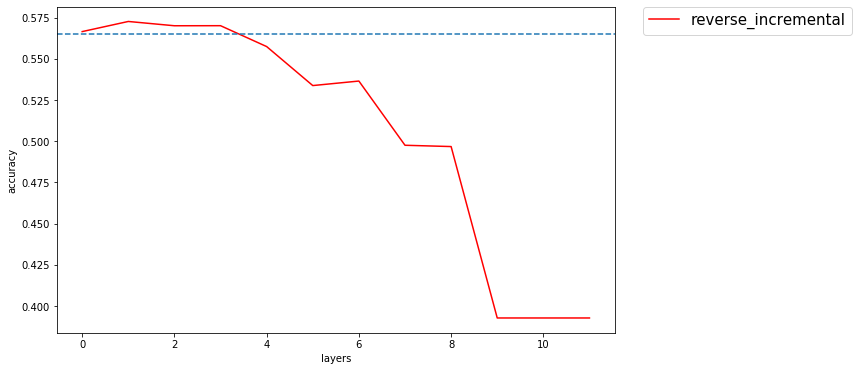

In [18]:
print("reverse_incremental", base_acc)
plt.figure(figsize=(10,6))
x_axis = range(num_layer)
hdles = []
handle, = plt.plot(x_axis, reverse_incremental_results["reverse_incremental"], c=color_dict[0], label="reverse_incremental")
hdles.append(handle)
plt.xlabel("layers")
plt.ylabel("accuracy")

plt.legend(handles=hdles)

plt.axhline(y=base_acc, linestyle='--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 15})
plt.show()